<a href="https://colab.research.google.com/github/ZeyadMohamedAyoub/ShatZam-App/blob/main/ML_a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loaded the file two times one for dropping the row of the empty data and the other for replacing empty with the feature's mean

In [ ]:
load_file = "weather_forecast_data.csv"
data_drop = pd.read_csv(load_file);
data_avg = pd.read_csv(load_file);

#1. number per data_drop
print("original number of records before any modification techniques: ", len(data_drop));

# print(data_drop.head());
print("\nClass distribution in the original dataset:")
print(data_drop['Rain'].value_counts())

if(data_drop.isnull().values.any()):
  print("\n !!! Data contains missing values \n", data_drop.isnull().sum());
else:
  print("\n !!! Data does not contain missing values");

data_drop.dropna(how='any', inplace=True);
print("\n After dropping any missing row \n", data_drop.isnull().sum());
#2. number after drop
print("Number of records after deopping missing rows: " , len(data_drop));
print("\nClass distribution after dropping missing rows:")
print(data_drop['Rain'].value_counts())

#excluded last col
mean_per_feature = data_avg.iloc[:, :-1].mean();

data_avg.fillna(mean_per_feature, inplace=True);
print("\n After filling with mean \n", data_avg.isnull().sum());
#3.number after avg
print(data_avg.head());
print("Number of records after filling the missing values with average: " , len(data_avg));
print("\nClass distribution after filling missing values with average:")
print(data_avg['Rain'].value_counts())


original number of records before any modification techniques:  2500

Class distribution in the original dataset:
Rain
no rain    2186
rain        314
Name: count, dtype: int64

 !!! Data contains missing values 
 Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64

 After dropping any missing row 
 Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64
Number of records after deopping missing rows:  2347

Class distribution after dropping missing rows:
Rain
no rain    2054
rain        293
Name: count, dtype: int64

 After filling with mean 
 Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64
   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    19.096119  71.651723   14.782324    48.699257   987.954760  no rain
1    27.112464  84.183705   13.289986    10.375646  1035.4308

In [ ]:
numerical_data_drop = data_drop.select_dtypes(include=[np.number]);
numerical_data_avg = data_avg.select_dtypes(include=[np.number]);

print("\nRanges of numeric features (data_drop):\n", numerical_data_drop.max() - numerical_data_drop.min());
print("\nRanges of numeric features (data_avg):\n", numerical_data_avg.max() - numerical_data_avg.min());


Ranges of numeric features (data_drop):
 Temperature    24.993372
Humidity       69.992410
Wind_Speed     19.989313
Cloud_Cover    99.982757
Pressure       69.971107
dtype: float64

Ranges of numeric features (data_avg):
 Temperature    24.993372
Humidity       69.992410
Wind_Speed     19.989313
Cloud_Cover    99.982757
Pressure       69.971107
dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# Encode target variable
le = LabelEncoder()
data_drop['Rain_Encoded'] = le.fit_transform(data_drop['Rain'])
data_avg['Rain_Encoded'] = le.transform(data_avg['Rain'])

#numeric features are scaled
#get max and min for normalizing the training data

#getting just the numeric features
# numerical_data_drop = data_drop.select_dtypes(include=[np.number]);
# numerical_data_avg = data_avg.select_dtypes(include=[np.number]);

# shuffle numeric the data before splitting @shehab
numeric_columns = data_drop.select_dtypes(include=[np.number]).columns.drop('Rain_Encoded')

data_drop_shuffled, data_drop_shuffled_target = shuffle(
    data_drop[numeric_columns],
    data_drop['Rain_Encoded'],
    random_state=42
)

data_avg_shuffled, data_avg_shuffled_target = shuffle(
    data_avg[numeric_columns],
    data_avg['Rain_Encoded'],
    random_state=42
)


#split data
#80% training and 20% testing
split_ratio = 0.8;
split_index_drop = int(split_ratio * len(data_drop_shuffled));

split_index_avg = int(split_ratio * len(data_avg_shuffled));

#splittiing the data
data_drop_train = data_drop_shuffled[:split_index_drop];
data_drop_test = data_drop_shuffled[split_index_drop:];
data_drop_train_target = data_drop_shuffled_target[:split_index_drop]
data_drop_test_target = data_drop_shuffled_target[split_index_drop:]


data_avg_train = data_avg_shuffled[:split_index_avg];
data_avg_test = data_avg_shuffled[split_index_avg:];
data_avg_train_target = data_avg_shuffled_target[:split_index_avg]
data_avg_test_target = data_avg_shuffled_target[split_index_avg:]


numerical_data_drop_min = data_drop_shuffled.min();
numerical_data_drop_max = data_drop_shuffled.max();
#############################################################
numerical_data_avg_min = data_avg_shuffled.min();
numerical_data_avg_max = data_avg_shuffled.max();
###############################################################

#scaling the training data
data_drop_train_normalized = (data_drop_train - numerical_data_drop_min) / (numerical_data_drop_max - numerical_data_drop_min)
data_avg_train_normalized = (data_avg_train - numerical_data_avg_min) / (numerical_data_avg_max - numerical_data_avg_min)

#scaling the test data using the train set statistics
data_drop_test_normalized = (data_drop_test - numerical_data_drop_min) / (numerical_data_drop_max - numerical_data_drop_min)
data_avg_test_normalized = (data_avg_test - numerical_data_avg_min) / (numerical_data_avg_max - numerical_data_avg_min)



print("Normalized data_drop:");
print (data_drop_train_normalized.head());
print("\nNormalized data_avg:");
print (data_avg_train_normalized.head());

print("Encoded Rain classes:", dict(enumerate(le.classes_)))
print("This is the test data features\n",data_drop_test.head())
print("This is its classes\n",data_drop_test_target.head())

Normalized data_drop:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
1490     0.420577  0.104930    0.732806     0.299071  0.472887
710      0.463093  0.238677    0.516303     0.364177  0.773947
2130     0.915032  0.992382    0.360497     0.770608  0.946896
861      0.888027  0.536249    0.388426     0.906050  0.587375
2028     0.773587  0.127027    0.348358     0.582963  0.408875

Normalized data_avg:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
1447     0.377778  0.738410    0.266836     0.351174  0.371695
1114     0.001521  0.409815    0.131886     0.470620  0.066741
1064     0.847890  0.915924    0.642522     0.104334  0.712887
2287     0.159814  0.813559    0.441391     0.681401  0.943532
1537     0.876664  0.155707    0.246786     0.004967  0.852536
Encoded Rain classes: {0: 'no rain', 1: 'rain'}
This is the test data features
       Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure
1351    10.729756  46.838144    0.554711    56.606423

NAIVE BAYES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

class NaiveBayes:

  def __init__(self):
    self.gnb = GaussianNB();

  def fit(self, X, y):
    self.model = self.gnb.fit(X, y);

  def predict(self, X):
    return self.model.predict(X);


nb_drop = NaiveBayes();
nb_drop.fit(data_drop_train_normalized, data_drop_train_target)

#make a prediction

predictions = nb_drop.predict(data_drop_test_normalized)

accuracy = accuracy_score(data_drop_test_target, predictions)
print("Accuracy for drop: ", accuracy);
print("Classification Report for drop:\n", classification_report(data_drop_test_target, predictions));

nb_avg = NaiveBayes();
nb_avg.fit(data_avg_train_normalized, data_avg_train_target)

#make a prediction

predictions = nb_avg.predict(data_avg_test_normalized)

accuracy = accuracy_score(data_avg_test_target, predictions);
print("Accuracy for avg: ", accuracy);
print("Classification Report for avg:\n", classification_report(data_avg_test_target, predictions));


Accuracy for drop:  0.9468085106382979
Classification Report for drop:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       399
           1       1.00      0.65      0.79        71

    accuracy                           0.95       470
   macro avg       0.97      0.82      0.88       470
weighted avg       0.95      0.95      0.94       470

Accuracy for avg:  0.956
Classification Report for avg:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       427
           1       1.00      0.70      0.82        73

    accuracy                           0.96       500
   macro avg       0.98      0.85      0.90       500
weighted avg       0.96      0.96      0.95       500



https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


In [ ]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score, classification_report

#In k values if small K values chosen --> Can lead to overfitting
#if large values chosen --> Can lead to underfitting
#since the datasets is around 2000 (80% of the dataset) then we will choose k = 43
class KNN:
  def __init__(self, k=43):
    self.knn = KNeighborsClassifier(n_neighbors=k);

  def fit(self, X, y):
    self.model = self.knn.fit(X, y);

  def predict(self, X):
    return self.model.predict(X);

knn_drop = KNN(k=5);
knn_avg = KNN(k=5);
# knn_drop = KNN(k=43);
# knn_avg = KNN(k=43);


##For the knn_drop
knn_drop.fit(data_drop_train_normalized, data_drop_train_target);
predictions = knn_drop.predict(data_drop_test_normalized);

accuracy = accuracy_score(data_drop_test_target, predictions);
print("Accuracy for drop at k = 5: ", accuracy);
print("Classification Report for drop:\n", classification_report(data_drop_test_target, predictions));


##For the knn_avg
knn_avg.fit(data_avg_train_normalized, data_avg_train_target);
predictions = knn_avg.predict(data_avg_test_normalized);

accuracy = accuracy_score(data_avg_test_target, predictions);
print("Accuracy for avg at k = 5: ", accuracy);
print("Classification Report for avg:\n", classification_report(data_avg_test_target, predictions));

Accuracy for drop at k = 5:  0.9638297872340426
Classification Report for drop:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       399
           1       0.92      0.83      0.87        71

    accuracy                           0.96       470
   macro avg       0.95      0.91      0.93       470
weighted avg       0.96      0.96      0.96       470

Accuracy for avg at k = 5:  0.96
Classification Report for avg:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       427
           1       0.86      0.86      0.86        73

    accuracy                           0.96       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.96      0.96      0.96       500



The output is significantly better in the knn particularly in terms of recall and F1-score for the minority class ("rain") which we've detected that it is very less than the other class ("no rain"), Observation: KNN's reliance on nearest neighbours makes it less biased toward the majority class.

Accuracy for drop:  1.0
Classification Report for drop:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00        71

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

Accuracy for avg:  0.994
Classification Report for avg:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       0.97      0.99      0.98        73

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



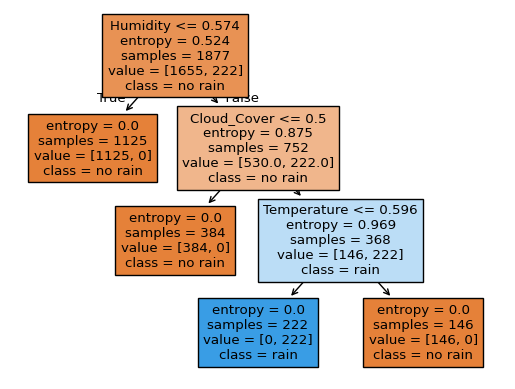

Tree depth: 3
Total number of nodes: 7
Number of leaf nodes: 4
Feature Importances:
Temperature: 0.3623
Humidity: 0.3312
Wind_Speed: 0.0000
Cloud_Cover: 0.3065
Pressure: 0.0000


In [ ]:
#DT NOTICE it is not a must to fit and train with normalized data but we did as no bad
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report

dt_drop = tree.DecisionTreeClassifier(criterion="entropy", max_depth=7);
dt_avg = tree.DecisionTreeClassifier(criterion="entropy", max_depth=7);

#dt_drop
dt_drop.fit(data_drop_train_normalized, data_drop_train_target);
predictions = dt_drop.predict(data_drop_test_normalized);

accuracy = accuracy_score(data_drop_test_target, predictions);
print("Accuracy for drop: ", accuracy);
print("Classification Report for drop:\n", classification_report(data_drop_test_target, predictions));

#dt_avg
dt_avg.fit(data_avg_train_normalized, data_avg_train_target);
predictions = dt_avg.predict(data_avg_test_normalized);

accuracy = accuracy_score(data_avg_test_target, predictions);
print("Accuracy for avg: ", accuracy);
print("Classification Report for avg:\n", classification_report(data_avg_test_target, predictions));


tree.plot_tree(dt_drop, feature_names=data_drop_train.columns,class_names=le.classes_, filled=True);
plt.show();

print("Tree depth:", dt_drop.tree_.max_depth);
print("Total number of nodes:", dt_drop.tree_.node_count);
print("Number of leaf nodes:", dt_drop.tree_.n_leaves);


#get imp then extract col name from the data frame
importances = dt_drop.feature_importances_;
feature_names = data_drop_train.columns;

#pairing each feature names with importance
feature_importance_dict = dict(zip(feature_names, importances));

#print feature names and its importance
print("Feature Importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance:.4f}");
#only three most imp features are used this is the 3 levels

#is it well separated classes in your dataset?

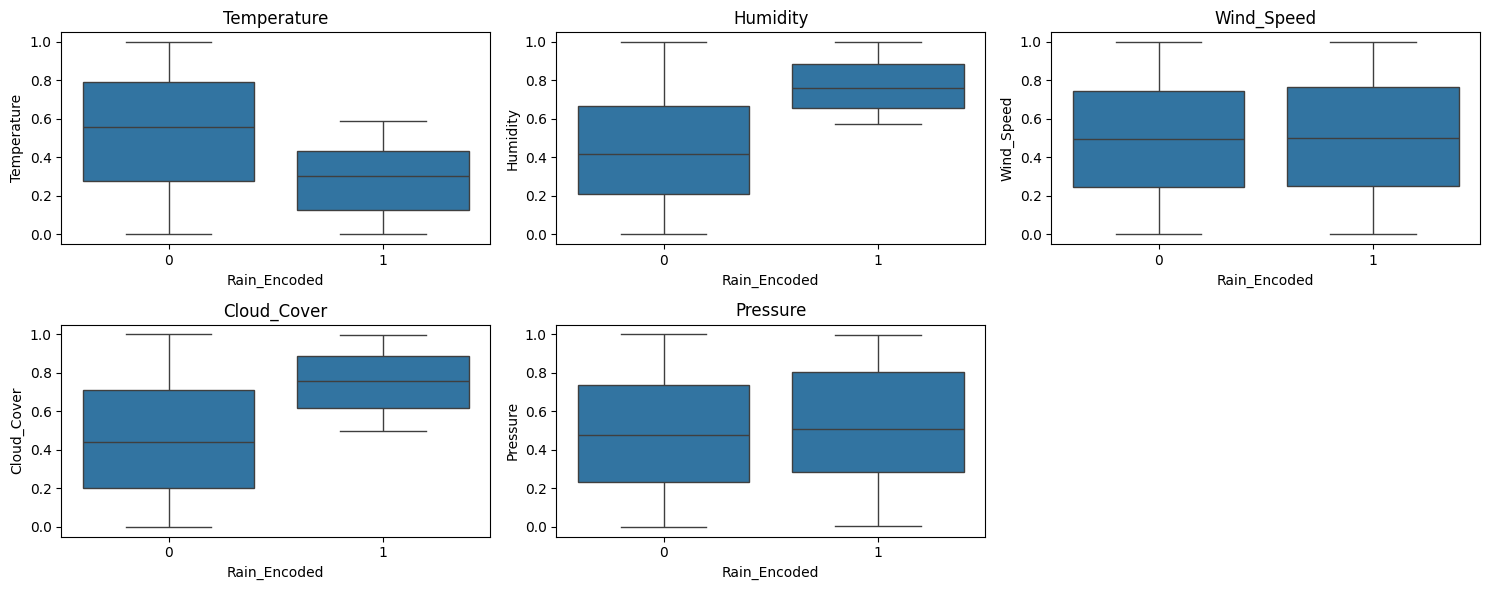

<Figure size 1200x1000 with 0 Axes>

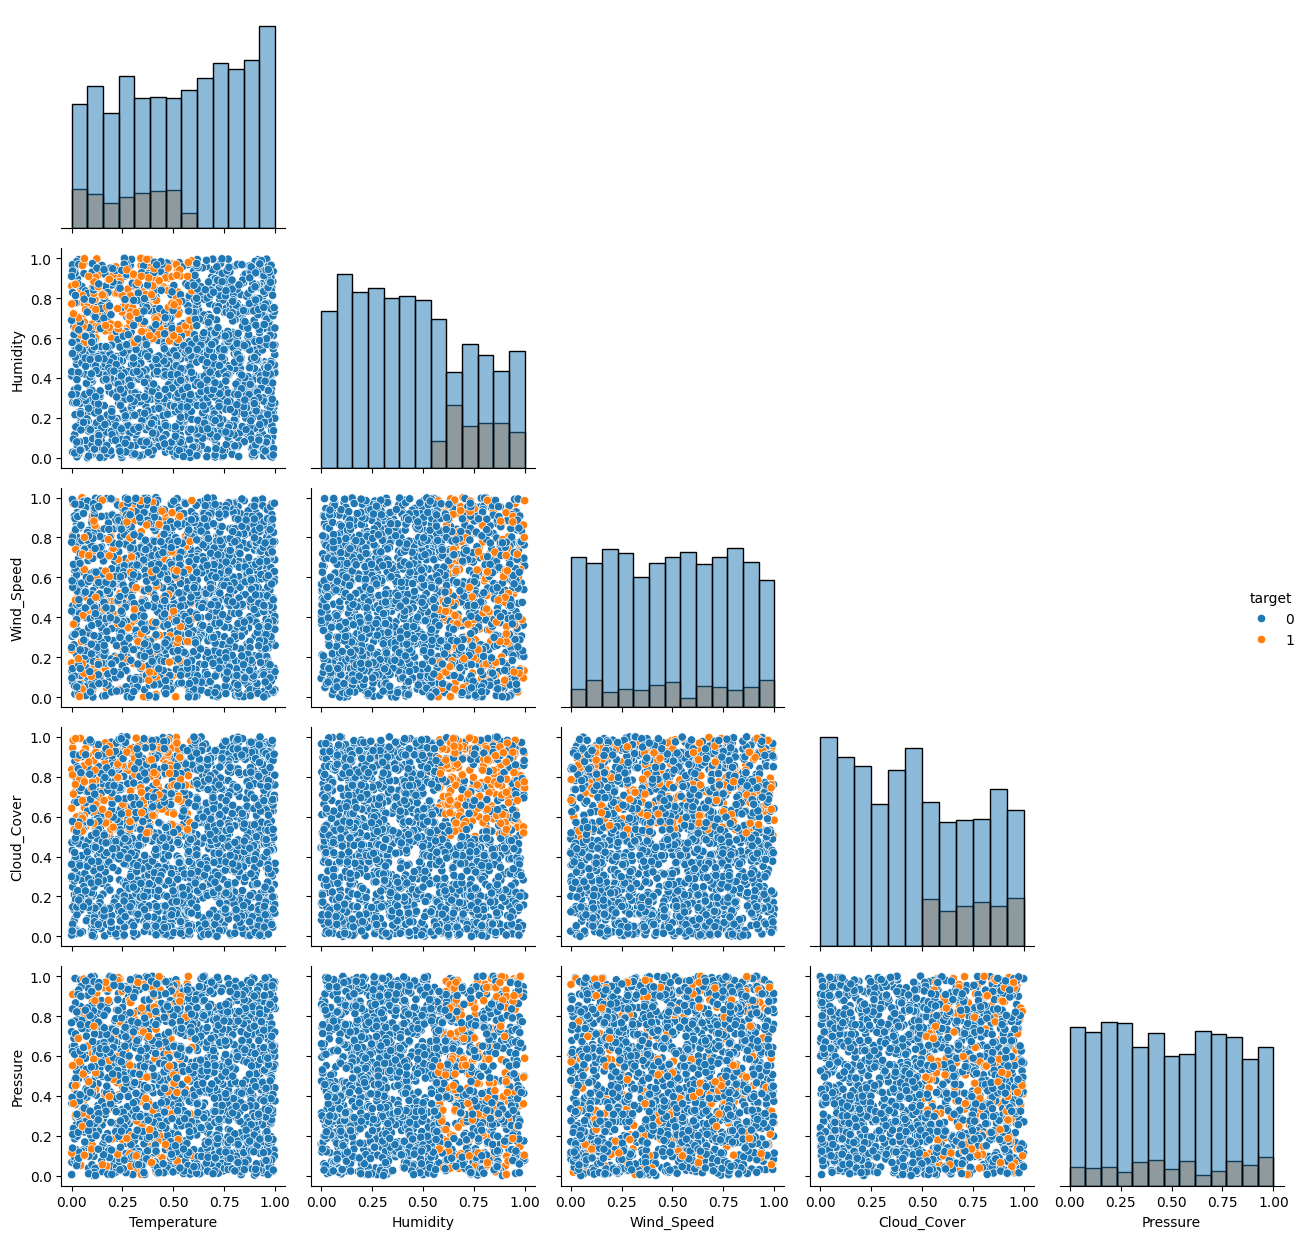

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_pair_relationships(X, y):
    plt.figure(figsize=(12, 10))
    df_plot = X.copy()
    df_plot['target'] = y
    sns.pairplot(df_plot, hue='target', diag_kind='hist', corner=True)
    plt.tight_layout()
    plt.show()


def plot_feature_distributions(X, y):
    plt.figure(figsize=(15, 6))
    for i, feature in enumerate(X.columns, 1):
        plt.subplot(2, len(X.columns)//2 + 1, i)
        sns.boxplot(x=y, y=X[feature])
        plt.title(feature)
    plt.tight_layout()
    plt.show()

plot_feature_distributions(data_drop_train_normalized, data_drop_train_target)
plot_pair_relationships(data_drop_train_normalized, data_drop_train_target)

In [ ]:
import numpy as np
import heapq
from collections import Counter
#troubleshooting
# for column in data_drop_train.columns:
#        unique_values = data_drop_train[column].unique();
#        print(f"Unique values in {column}: {unique_values}");

class KNNScratch:
    def __init__(self, k):
        self.k = k;
        self.X_train = None;
        self.y_train = None;

    def manhattan_distance(self, x1, x2):
        #x1 and x2 are numpy arrays of numeric type
        x1 = np.asarray(x1, dtype=float);
        x2 = np.asarray(x2, dtype=float);
        # return np.sqrt(np.sum((x1 - x2) ** 2)) #for euclidean
        return np.sum(np.abs(x1 - x2));

    def fit(self, X, y):
        #X is converted to a numpy array of float type
        self.X_train = np.asarray(X, dtype=float);
        self.y_train = np.asarray(y);
        return self;

    #as it takes only logn instead of nlogn
    def get_neighbors_with_heap(self, x):
        #ensuring x is converted to float type
        x = np.asarray(x, dtype=float);
        heap = [];
        for x_train, y_train in zip(self.X_train, self.y_train):
            distance = self.manhattan_distance(x, x_train);
            if len(heap) < self.k:
                heapq.heappush(heap, (-distance, y_train));
            else:
                if -distance > heap[0][0]:
                    heapq.heappop(heap);
                    heapq.heappush(heap, (-distance, y_train));
        return [(abs(dist), label) for dist, label in sorted(heap, key=lambda x: x[0])];

    def predict(self, X):
        #ensuring X is converted to numpy array
        X = np.asarray(X, dtype=float);
        predictions = [];
        for x in X:
            neighbors = self.get_neighbors_with_heap(x);
            neighbor_labels = [label for _, label in neighbors];
            most_common = Counter(neighbor_labels).most_common(1)[0][0];
            predictions.append(most_common);
        return np.array(predictions);

from sklearn.metrics import accuracy_score, classification_report

def test_knn_with_multiple_k(k_values, X_train, y_train, X_test, y_test, dataset_name):
    for k in k_values:
        print(f"\nTesting KNN with k={k} on {dataset_name} dataset:");
        knn_model = KNNScratch(k=k);
        knn_model.fit(X_train, y_train);
        predictions = knn_model.predict(X_test);

        accuracy = accuracy_score(y_test, predictions);
        print(f"Accuracy for k={k}: {accuracy}");
        print(f"Classification Report for k={k}:\n{classification_report(y_test, predictions)}");

k_values = [1, 3, 5, 20, 43];

print("Results for data_drop dataset:");
test_knn_with_multiple_k(k_values, data_drop_train_normalized, data_drop_train_target, data_drop_test_normalized, data_drop_test_target, "data_drop");

print("\nResults for data_avg dataset:");
test_knn_with_multiple_k(k_values, data_avg_train_normalized, data_avg_train_target, data_avg_test_normalized, data_avg_test_target, "data_avg");


Results for data_drop dataset:

Testing KNN with k=1 on data_drop dataset:
Accuracy for k=1: 0.948936170212766
Classification Report for k=1:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       399
           1       0.86      0.79      0.82        71

    accuracy                           0.95       470
   macro avg       0.91      0.88      0.90       470
weighted avg       0.95      0.95      0.95       470


Testing KNN with k=3 on data_drop dataset:
Accuracy for k=3: 0.9723404255319149
Classification Report for k=3:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       399
           1       0.95      0.86      0.90        71

    accuracy                           0.97       470
   macro avg       0.96      0.93      0.94       470
weighted avg       0.97      0.97      0.97       470


Testing KNN with k=5 on data_drop dataset:
Accuracy for k=5: 0.9659574468085106
Classificat